In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVC
from sklearn import datasets
import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
from itertools import cycle

%matplotlib inline

In [168]:
data = datasets.load_breast_cancer()

In [169]:
X = data.data
Y = data.target

In [170]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
X['Target'] = Y
X.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [171]:
F_data = X
F_data.head(50)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [129]:
F_data.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29, 'Target'],
      dtype='object')

(array([212.,   0., 357.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

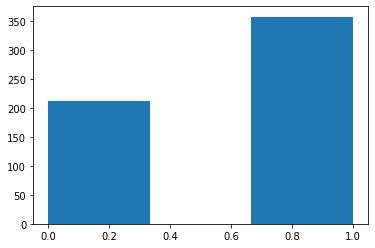

In [130]:
plt.hist(F_data['Target'],bins=3)

In [131]:
len(F_data)

569

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002255BCE0088>,
      dtype=object)

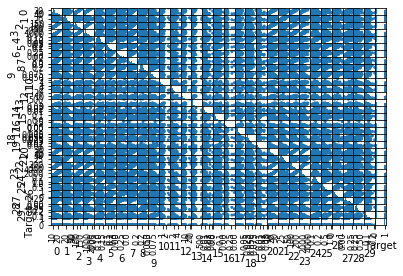

In [51]:
pd.plotting.scatter_matrix(F_data,alpha=1)

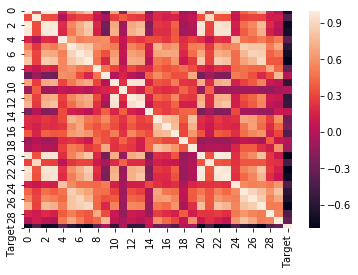

In [52]:
sns.heatmap(F_data.corr())

In [53]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
0         569 non-null float64
1         569 non-null float64
2         569 non-null float64
3         569 non-null float64
4         569 non-null float64
5         569 non-null float64
6         569 non-null float64
7         569 non-null float64
8         569 non-null float64
9         569 non-null float64
10        569 non-null float64
11        569 non-null float64
12        569 non-null float64
13        569 non-null float64
14        569 non-null float64
15        569 non-null float64
16        569 non-null float64
17        569 non-null float64
18        569 non-null float64
19        569 non-null float64
20        569 non-null float64
21        569 non-null float64
22        569 non-null float64
23        569 non-null float64
24        569 non-null float64
25        569 non-null float64
26        569 non-null float64
27        569 non-null float64
28        569 non-null floa

In [54]:
F_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [172]:
X  = F_data.drop(['Target'],axis=1)
Y  = F_data['Target']

In [67]:
model = SVC(kernel = 'linear',C=5,random_state=42)

In [68]:
score = cross_val_score(model,X,Y,cv=10)

In [69]:
score

array([0.98275862, 0.93103448, 0.92982456, 0.94736842, 0.96491228,
       0.98245614, 0.92982456, 0.94642857, 0.96428571, 0.96428571])

In [70]:
np.mean(score)

0.9543179068360554

In [73]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [75]:
model.fit(x_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [76]:
model.score(x_test,y_test)

0.9590643274853801

In [78]:
pred = model.predict(x_test)

In [82]:
sco = metrics.accuracy_score(y_test,pred)

In [83]:
sco

0.9590643274853801

In [93]:
# PCA


In [173]:
pca  = PCA(n_components=3,whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [174]:
pca.components_

array([[ 5.08623202e-03,  2.19657026e-03,  3.50763298e-02,
         5.16826469e-01,  4.23694535e-06,  4.05260047e-05,
         8.19399539e-05,  4.77807775e-05,  7.07804332e-06,
        -2.62155251e-06,  3.13742507e-04, -6.50984008e-05,
         2.23634150e-03,  5.57271669e-02, -8.05646029e-07,
         5.51918197e-06,  8.87094462e-06,  3.27915009e-06,
        -1.24101836e-06, -8.54530832e-08,  7.15473257e-03,
         3.06736622e-03,  4.94576447e-02,  8.52063392e-01,
         6.42005481e-06,  1.01275937e-04,  1.68928625e-04,
         7.36658178e-05,  1.78986262e-05,  1.61356159e-06],
       [ 9.28705650e-03, -2.88160658e-03,  6.27480827e-02,
         8.51823720e-01, -1.48194356e-05, -2.68862249e-06,
         7.51419574e-05,  4.63501038e-05, -2.52430431e-05,
        -1.61197148e-05, -5.38692831e-05,  3.48370414e-04,
         8.19640791e-04,  7.51112451e-03,  1.49438131e-06,
         1.27357957e-05,  2.86921009e-05,  9.36007477e-06,
         1.22647432e-05,  2.89683790e-07, -5.68673345e-

In [175]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649, 0.00155751])

In [176]:
pca.explained_variance_ratio_.sum()

0.9997786721191871

In [177]:
x_pca = pca.transform(X)

In [178]:
x_pca

array([[ 1.74151102, -3.43766734,  1.83108348],
       [ 1.90510267,  0.18281102, -1.33413925],
       [ 1.49480423,  0.4579783 , -0.06444635],
       ...,
       [ 0.47210428,  0.55618729, -0.39360951],
       [ 1.68854488,  0.39917632, -0.74414579],
       [-1.15815408, -1.03677211,  0.9004581 ]])

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,Y,test_size=.3,random_state=42)

In [180]:
model1 = SVC(kernel='linear',C=5,random_state=42)

In [181]:
model1.fit(x_pca,Y)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [182]:
model1.score(x_test,y_test)

0.9766081871345029

In [184]:
X = pd.DataFrame(x_pca)

X.columns = ['one','two','three']
X.head()

,one,two,three
0,1.741511,-3.437667,1.831083
1,1.905103,0.182811,-1.334139
2,1.494804,0.457978,-0.064446
3,-0.611226,-0.788082,0.326909
4,1.396552,2.214534,0.051821


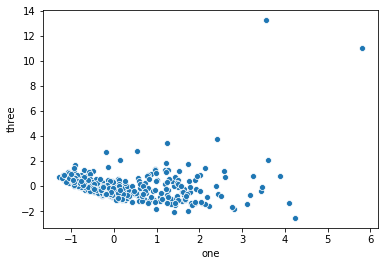

In [188]:
sns.scatterplot(x='one',y='three',data=X)

In [192]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

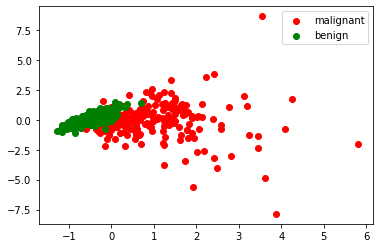

In [194]:
def plot(data,target,target_names):
    colors  =cycle('rgb')
    ida = range(len(target_names))
    plt.figure()
    
    for x,c,label in zip(ida,colors,target_names):
        plt.scatter(data[target == x,0], data[target == x,1], c=c, label=label)
    plt.legend()

plot(x_pca,data.target,data.target_names)

In [198]:
# Comparing cross validation and normal training results and saving the models

In [199]:
data = datasets.load_breast_cancer()

In [200]:
X = data.data
Y = data.target
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
X['Target'] = Y
F_data = X
F_data.head(50)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Target
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0


In [201]:
X  = F_data.drop(['Target'],axis=1)
Y  = F_data['Target']

In [202]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=42)

In [206]:
model1 = SVC(kernel='linear',C=5,random_state=42).fit(x_train,y_train)
import pickle
pickle.dump(model1,open("model1.sav","wb"))

In [204]:
pred  = model.predict(x_test)
scor = metrics.accuracy_score(y_test,pred)
print(scor)

0.9590643274853801


In [205]:
# CV

In [207]:
data = datasets.load_breast_cancer()
X = data.data
Y = data.target
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
X['Target'] = Y
F_data = X
X  = F_data.drop(['Target'],axis=1)
Y  = F_data['Target']

In [214]:
model2 = SVC(kernel='linear',C=5,random_state=42).fit(x_train,y_train)

In [215]:
score = cross_val_score(model2,X,Y,cv=10)
pickle.dump(model2,open("model2.sav",'wb'))

In [217]:
model2 = pickle.load(open("model2.sav",'rb'))
re = model2.predict(x_test)
res = metrics.accuracy_score(y_test,re)

In [218]:
res

0.9590643274853801